# Exploratory Data Analysis - Particles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from plot_utils import plot_1Dhist, display_statistics, plot_1Dstack

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"


In [2]:
def read_data(fname, dir="../data/"):
    # Read data from csv file
    return pd.read_csv(os.path.join(dir, fname))

def save_fig(fig, fname, dir="../plots/eda/"):
    # Save figure to file
    fig.savefig(os.path.join(dir, fname), dpi=300, facecolor="w")

In [3]:
PARTICLE_FNAME = "particle_df.csv"

FONTSIZE = 16

SAVE_FIG = False

---

In [4]:
# read in the data
par_df = read_data(PARTICLE_FNAME)

# display the first 5 rows of the data
par_df.head()

,eventID,jetID,particleType,particleVx,particleVy,particleVz,particlePx,particlePy,particlePz,particleE,particlePolarPx,particlePolarPy,particlePolarPz,particlePolarE,particlePhi,particleTheta
0,0,0,0,0.000000,0.000000,0.000000,-115.595071,5.513218,107.093643,157.675996,115.726471,0.827630,3.093935,2.347607e-01,3.093935,0.824122
1,0,0,0,0.000000,0.000000,0.000000,-83.072377,4.831796,75.798599,112.561324,83.212776,0.816948,3.083494,5.078805e-01,3.083494,0.831991
2,0,0,-211,-0.981025,1.422285,-33.456345,-11.168506,-8.774579,9.043395,16.838385,14.203125,0.600055,-2.475661,1.395264e-01,-2.475661,1.003814
3,0,0,130,0.073932,0.089866,-2.399344,-8.233158,-1.087632,6.647210,10.637351,8.304688,0.732994,-3.010249,-1.192093e-07,-3.010249,0.895801
4,0,0,-211,0.073905,0.089409,-2.399101,-8.048296,0.478376,6.097900,10.109785,8.062500,0.698202,3.082224,1.395264e-01,3.082224,0.923257


In [5]:
# Print the number of rows and columns in the DataFrame. 
print("Rows x Columns: ", par_df.shape)

# Print the number of unique events and particles in the DataFrame. 
print("Number of events: ", par_df["eventID"].nunique())

# Print the number of unique particles in the DataFrame.
print("Number of jets: ", par_df["jetID"].nunique())

# List the unique particle types in the DataFrame.
print("Unique particle types: ", par_df["particleType"].unique())

Rows x Columns:  (168058, 16)
Number of events:  3668
Number of jets:  5851
Unique particle types:  [   0 -211  130  211   22    2    1   13  -11   11  -13]


## Particle type

The particle numbering scheme is as follows:

| Number | Particle |
|:------:|:--------:|
| 0      | unknown |
| 1      | down quark |
| 2      | up quark |
| 11     | electron |
| 13     | muon |
| 22     | photon |
| 130    | neutral kaon (long) |
| 211    | charged pion |

where the numbers are the PDG ID numbers. Positive numbers are particles and negative numbers are antiparticles.



In [6]:
# REMOVE TYPE 0 PARTICLES
par_df = par_df[par_df["particleType"] != 0]

In [7]:
# CUT ON THE PARTICLE ENERGY: E < 50 GeV
par_df = par_df[par_df["particleE"] < 50]


In [8]:
par_df.loc[:, "particleName"] = par_df["particleType"].map({
    0:    "$?$",
    1:    "$d$",
    2:    "$u$",
    11:   "$e^{\pm}$",
    -11:  "$e^{\pm}$",
    13:   "$\mu^{\pm}$",
    -13:  "$\mu^{\pm}$",
    22:   "$\gamma$",
    130:  "$K^0_L$",
    211:  "$\pi^{\pm}$",
    -211: "$\pi^{\pm}$"
})
par_df.head()

,eventID,jetID,particleType,particleVx,particleVy,particleVz,particlePx,particlePy,particlePz,particleE,particlePolarPx,particlePolarPy,particlePolarPz,particlePolarE,particlePhi,particleTheta,particleName
2,0,0,-211,-0.981025,1.422285,-33.456345,-11.168506,-8.774579,9.043395,16.838385,14.203125,0.600055,-2.475661,1.395264e-01,-2.475661,1.003814,$\pi^{\pm}$
3,0,0,130,0.073932,0.089866,-2.399344,-8.233158,-1.087632,6.647210,10.637351,8.304688,0.732994,-3.010249,-1.192093e-07,-3.010249,0.895801,$K^0_L$
4,0,0,-211,0.073905,0.089409,-2.399101,-8.048296,0.478376,6.097900,10.109785,8.062500,0.698202,3.082224,1.395264e-01,3.082224,0.923257,$\pi^{\pm}$
5,0,0,211,0.073976,0.091909,-2.399079,-4.639545,0.100107,4.272678,6.309568,4.640625,0.824183,3.120019,1.395264e-01,3.120019,0.826655,$\pi^{\pm}$
6,0,0,130,0.073932,0.089866,-2.399344,-1.395184,0.060261,0.712286,1.567648,1.396484,0.490188,3.098427,-0.000000e+00,3.098427,1.099136,$K^0_L$


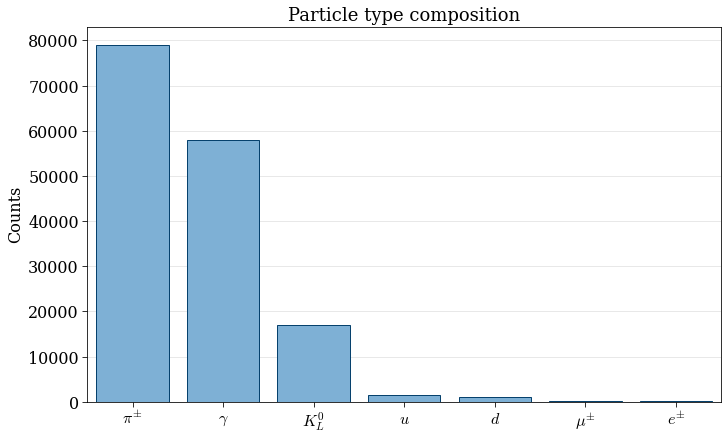

In [9]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

ax = fig.add_subplot(1, 1, 1)
ax.grid(axis="y", color="lightgray", linestyle="-", linewidth=1, alpha=0.5)
ax.set_axisbelow(True)

# Group particles by name
group  = par_df.groupby("particleName")

# Count the number of particles of each type
count  = group.size().sort_values(ascending=False)

# Create a new dataframe with the counts
df = pd.DataFrame({"count": count})

# make a bar plot of the number of particles in each particle type
# but consider the absolute value of the particle type
sns.barplot(data=df, x=df.index, y="count", ax=ax, facecolor="#7eb0d5", edgecolor="#06416D")

# Set the x and y labels
ax.set_xlabel("", fontsize=FONTSIZE, fontname="serif")
ax.set_ylabel("Counts", fontsize=FONTSIZE, fontname="serif")
    
# Set the plot title
ax.set_title("Particle type composition", fontsize=FONTSIZE+2, fontname="serif")
    
# Set the tick parameters
ax.tick_params(axis="both", which="major", labelsize=FONTSIZE, length=5)


if SAVE_FIG:
    save_fig(fig, "particle_composition.pdf")


plt.show()

## 4-momentum

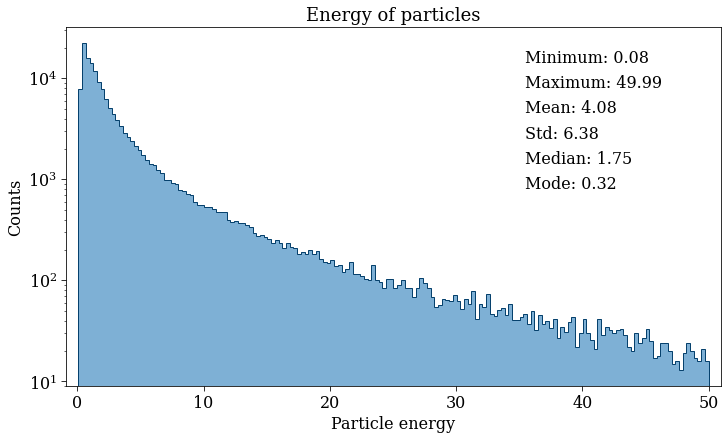

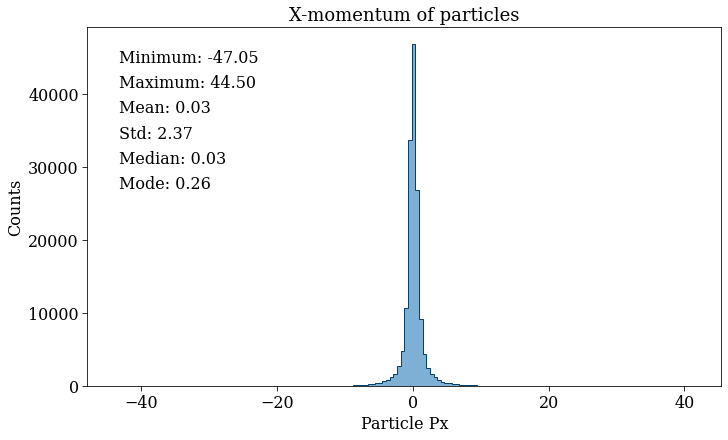

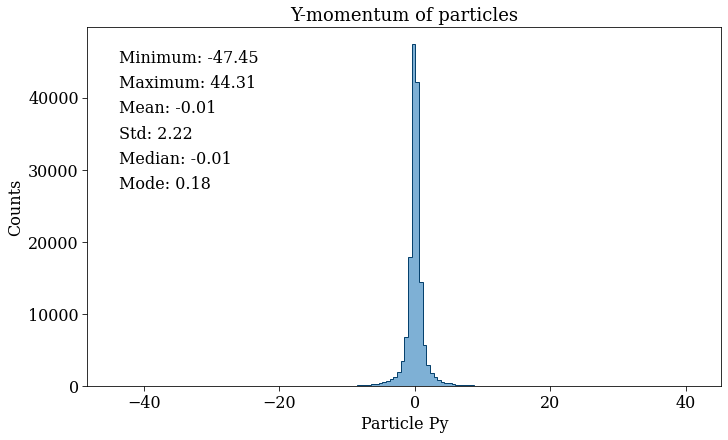

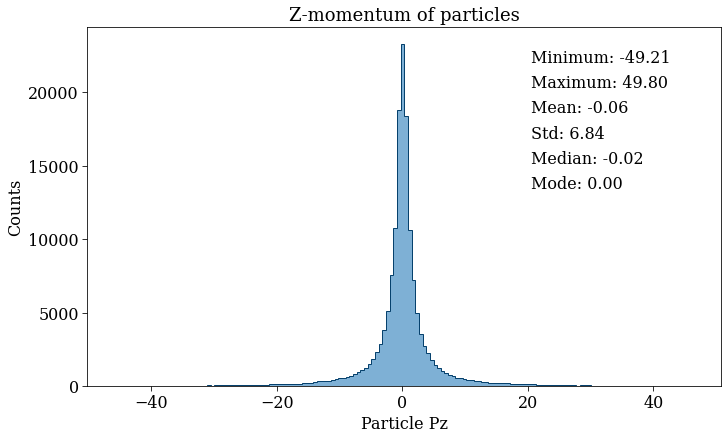

In [10]:
# --------- ENERGY
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particleE"].min()
xmax = par_df["particleE"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particleE"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Energy of particles",
    xlab     = "Particle energy",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax.set_yscale("log")

ax = display_statistics(par_df["particleE"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particleEnergy_distribution.pdf")


# --------- PX
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particlePx"].min()
xmax = par_df["particlePx"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePx"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "X-momentum of particles",
    xlab     = "Particle Px",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(par_df["particlePx"], ax, fontsize=FONTSIZE, x=0.05, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particlePx_distribution.pdf")


# --------- PY
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particlePy"].min()
xmax = par_df["particlePy"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePy"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Y-momentum of particles",
    xlab     = "Particle Py",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(par_df["particlePy"], ax, fontsize=FONTSIZE, x=0.05, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particlePy_distribution.pdf")
    

# --------- PZ
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particlePz"].min()
xmax = par_df["particlePz"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePz"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Z-momentum of particles",
    xlab     = "Particle Pz",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(par_df["particlePz"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particlePz_distribution.pdf")
    
    
plt.show()

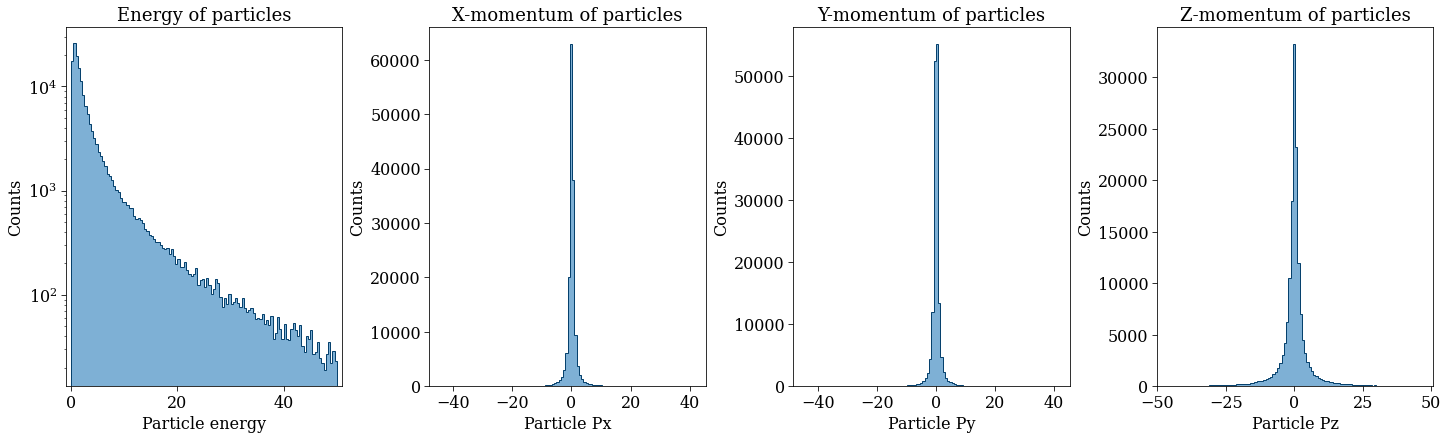

In [11]:
# 4-MOMENTUM

# figure that holds 4 subplots: 1 row 4 columns
fig = plt.figure(figsize=(20, 6), constrained_layout=True)

# --------- ENERGY

xmin = par_df["particleE"].min()
xmax = par_df["particleE"].max()

n = 120
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particleE"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Energy of particles",
    xlab     = "Particle energy",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 1
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax.set_yscale("log")



# --------- PX

xmin = par_df["particlePx"].min()
xmax = par_df["particlePx"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePx"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "X-momentum of particles",
    xlab     = "Particle Px",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 2
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)



# --------- PY

xmin = par_df["particlePy"].min()
xmax = par_df["particlePy"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePy"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Y-momentum of particles",
    xlab     = "Particle Py",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 3
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


    

# --------- PZ

xmin = par_df["particlePz"].min()
xmax = par_df["particlePz"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePz"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Z-momentum of particles",
    xlab     = "Particle Pz",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 4
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


if SAVE_FIG:
    save_fig(fig, "particle4momentum.pdf")
    
    
plt.show()

## Polar 4-momentum

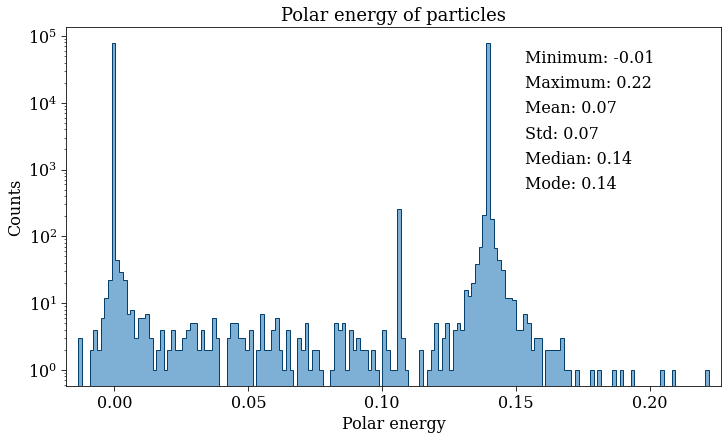

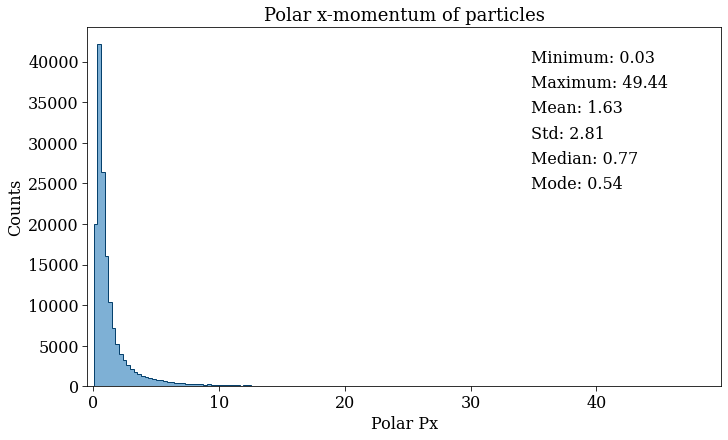

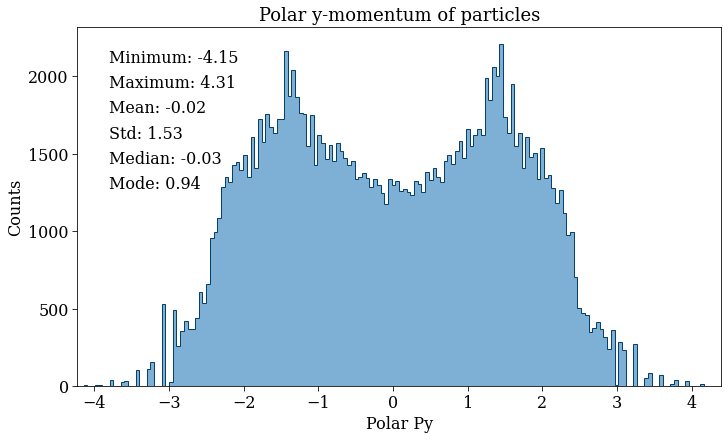

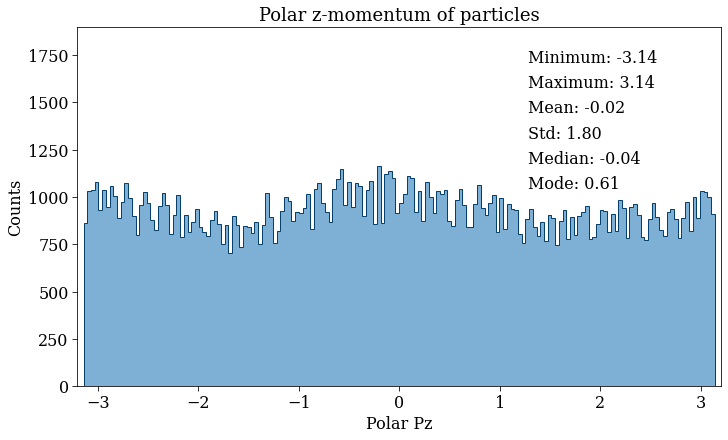

In [12]:
# --------- ENERGY
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particlePolarE"].min()
xmax = par_df["particlePolarE"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePolarE"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar energy of particles",
    xlab     = "Polar energy",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(par_df["particlePolarE"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

ax.set_yscale("log")

if SAVE_FIG:
    save_fig(fig, "particlePolarEnergy_distribution.pdf")


# --------- PX
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particlePolarPx"].min()
xmax = par_df["particlePolarPx"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePolarPx"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar x-momentum of particles",
    xlab     = "Polar Px",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(par_df["particlePolarPx"], ax, fontsize=FONTSIZE, x=0.7, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particlePolarPx_distribution.pdf")


# --------- PY
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particlePolarPy"].min()
xmax = par_df["particlePolarPy"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePolarPy"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar y-momentum of particles",
    xlab     = "Polar Py",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(par_df["particlePolarPy"], ax, fontsize=FONTSIZE, x=0.05, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particlePolarPy_distribution.pdf")
    

# --------- PZ
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particlePolarPz"].min()
xmax = par_df["particlePolarPz"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePolarPz"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar z-momentum of particles",
    xlab     = "Polar Pz",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)
ax.set_ylim(top=1900)

ax = display_statistics(par_df["particlePolarPz"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particlePolarPz_distribution.pdf")
    
    
plt.show()

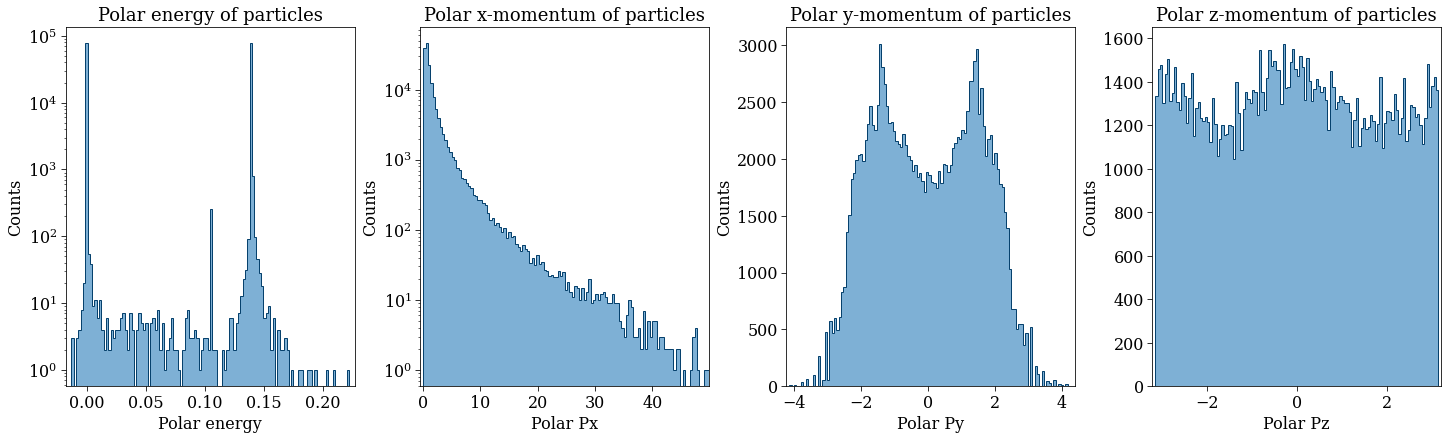

In [13]:
# 4-MOMENTUM

# figure that holds 4 subplots: 1 row 4 columns
fig = plt.figure(figsize=(20, 6), constrained_layout=True)

# --------- ENERGY

xmin = par_df["particlePolarE"].min()
xmax = par_df["particlePolarE"].max()

n = 120
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePolarE"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar energy of particles",
    xlab     = "Polar energy",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 1
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax.set_yscale("log")


# --------- PX

xmin = par_df["particlePolarPx"].min()
xmax = par_df["particlePolarPx"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePolarPx"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar x-momentum of particles",
    xlab     = "Polar Px",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 2
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax.set_yscale("log")


# --------- PY

xmin = par_df["particlePolarPy"].min()
xmax = par_df["particlePolarPy"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePolarPy"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar y-momentum of particles",
    xlab     = "Polar Py",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 3
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


    

# --------- PZ

xmin = par_df["particlePolarPz"].min()
xmax = par_df["particlePolarPz"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePolarPz"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar z-momentum of particles",
    xlab     = "Polar Pz",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 4
)

x_delta = (xmax - xmin) / 100 * 1 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


if SAVE_FIG:
    save_fig(fig, "particlePolar4momentum.pdf")
    
    
plt.show()

## Phi and Theta of particles

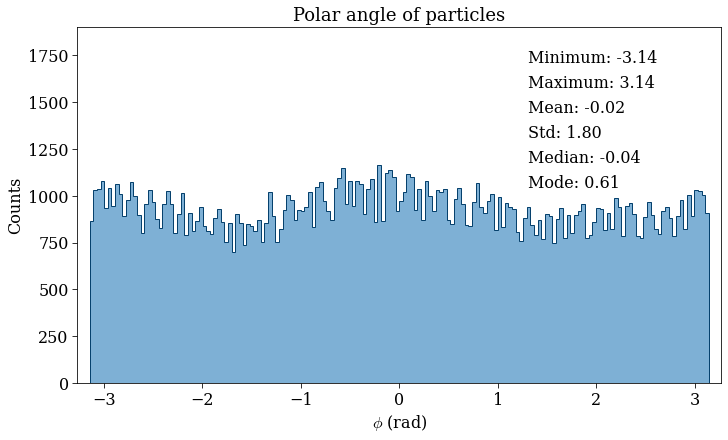

In [14]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particlePhi"].min()
xmax = par_df["particlePhi"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particlePhi"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar angle of particles",
    xlab     = "$\phi$ (rad)",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)
ax.set_ylim(top=1900)

ax = display_statistics(par_df["particlePhi"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particlePhi_distribution.pdf")

plt.show()

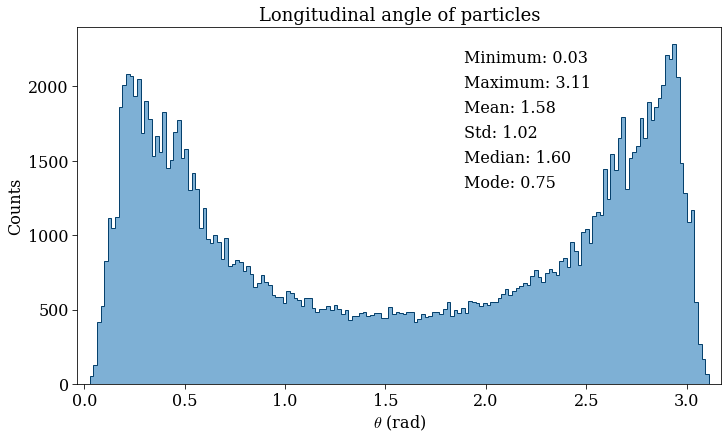

In [15]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = par_df["particleTheta"].min()
xmax = par_df["particleTheta"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = par_df["particleTheta"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Longitudinal angle of particles",
    xlab     = r"$\theta$ (rad)",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


ax = display_statistics(par_df["particleTheta"], ax, fontsize=FONTSIZE, x=0.6, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "particleTheta_distribution.pdf")

plt.show()

## Color-coding particles

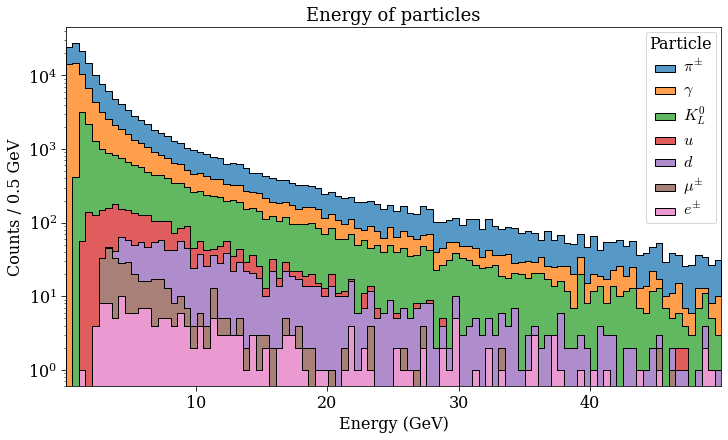

In [16]:
xmin = par_df["particleE"].min()
xmax = par_df["particleE"].max()

n    = 100
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

binwidth = bins[1] - bins[0]

fig = plt.figure(figsize=(10, 6), constrained_layout=True)

ax = plot_1Dstack(
    data       = par_df["particleE"],
    hue        = par_df["particleName"],
    fig        = fig,
    bins       = bins,
    xlab       = "Energy (GeV)",
    ylab       = f"Counts / {binwidth:.1f} GeV",
    title      = "Energy of particles",
    fontsize   = FONTSIZE,
    legend     = True,
    legend_out = False,
)

ax.set_yscale("log")

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin, xmax)

if SAVE_FIG:
    save_fig(fig, "particleE_hue.pdf")

plt.show()

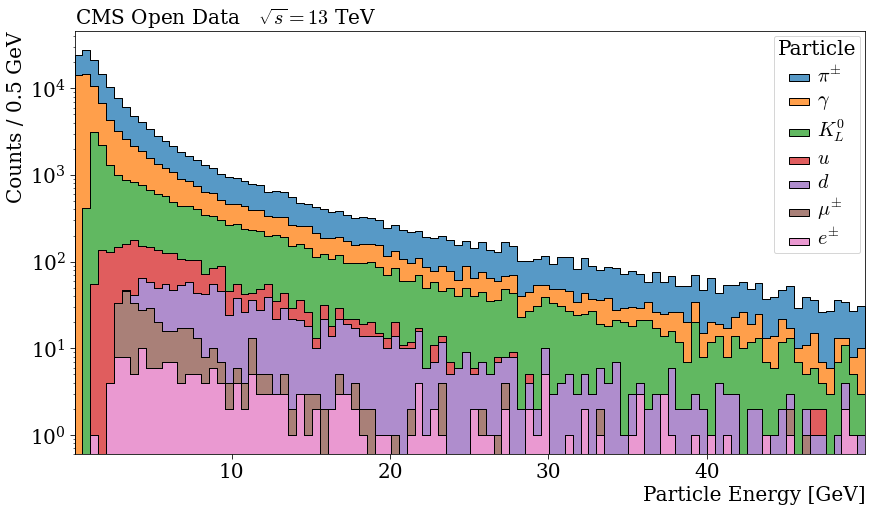

In [39]:
xmin = par_df["particleE"].min()
xmax = par_df["particleE"].max()

n    = 100
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

binwidth = bins[1] - bins[0]

fig = plt.figure(figsize=(12, 7), constrained_layout=True)

ax = plot_1Dstack(
    data       = par_df["particleE"],
    hue        = par_df["particleName"],
    fig        = fig,
    bins       = bins,
    xlab       = "Energy (GeV)",
    ylab       = f"Counts / {binwidth:.1f} GeV",
    title      = "",
    fontsize   = FONTSIZE+4,
    legend     = True,
    legend_out = False,
)

ax.set_yscale("log")

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin, xmax)

# put the x label on the right instead of in the middle 
ax.set_xlabel("Particle Energy [GeV]", loc="right")
ax.set_ylabel(f"Counts / {binwidth:.1f} GeV", loc="top")

ax.set_title("CMS Open Data   $\sqrt{s}=13$ TeV", loc="left", fontsize=FONTSIZE+4)

if SAVE_FIG:
    save_fig(fig, "particleE_hue.pdf")

plt.show()